In [1]:
import numpy as np
from scipy.stats import ks_2samp
from scipy import stats
import matplotlib.pyplot as plt
import h5py
import illustris_python as il
import sys
sys.path.append('../../py_files/')
#import weights
import control_sample as control
import BRAHMA_python as il_brahma
from tqdm import tqdm

import host_galaxy_enhancement_plots as hostplot


In [2]:
import os
tex_path = '/apps/texlive/2023/bin/x86_64-linux/'
os.environ['PATH'] += os.pathsep + tex_path
import scienceplots
plt.style.use('science')

In [3]:
pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/' 

In [19]:
brahma_basepath="/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/"
brahma_simName_array = ['SM5_TNG','SM5_LW10_TNG','SM5_LW10_LOWSPIN_TNG','SM5_LW10_LOWSPIN_RICH_TNG']

In [21]:
simPath = brahma_basepath + brahma_simName_array[0] + '/'
brahma_pop_Nstar10 = control.load_pop_file(simPath,pop_file_path,[0,0,10,1])
brahma_control = control.control_sample_brahma(brahma_pop_Nstar10)

processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 585.83it/s]

Number of cases where a close enough match is not found within the acceptable tolerance: 120
number of processable mergers with valid controls:
654


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 574.78it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 120
number of processable mergers with valid controls:
654


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 689.05it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 117
number of processable mergers with valid controls:
526


processing each merger redshifts for controls:   0%|          | 0/17 [00:00<?, ?it/s]

processing each merger redshifts for controls: 100%|██████████| 17/17 [00:00<00:00, 843.72it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 85
number of processable mergers with valid controls:
400


processing each merger redshifts for controls: 100%|██████████| 18/18 [00:00<00:00, 1229.08it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 53
number of processable mergers with valid controls:
123


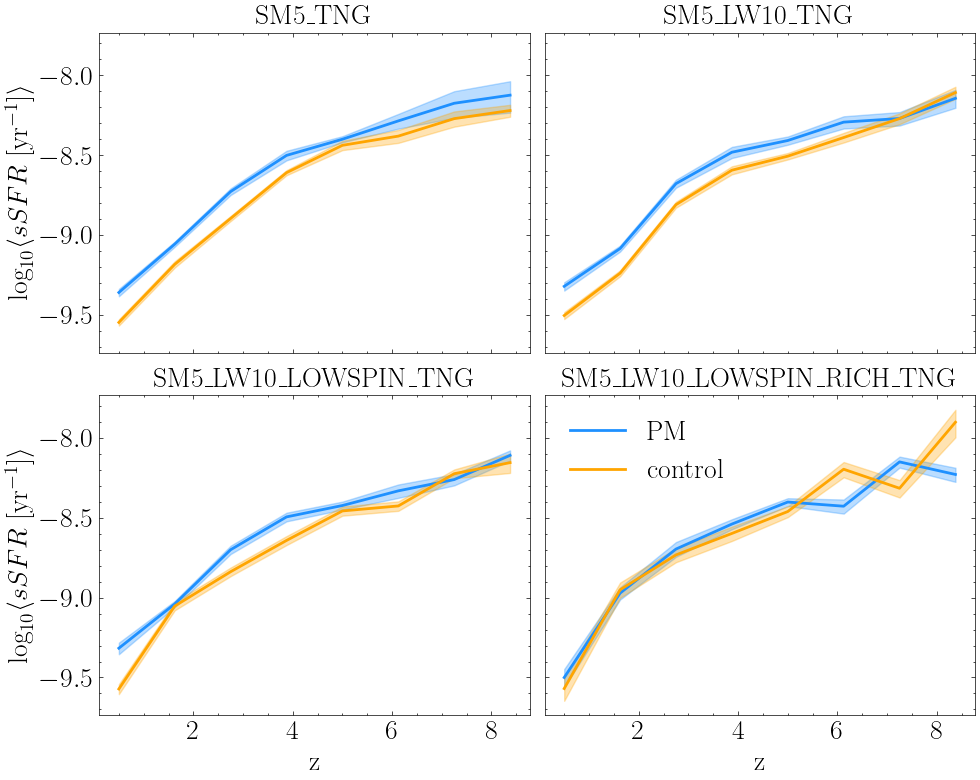

In [45]:
fig, axes = plt.subplots(2,2, figsize=(10,8),sharex=True,sharey=True)
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=20,ticksize=20,legendsize=20)
# axes[1][2].set_visible(False)
# axes[1][0].set_position([0.24,0.125,0.228,0.343])
# axes[1][1].set_position([0.55,0.125,0.228,0.343])
flattened_axes = axes.flatten()

for i,sim in enumerate(brahma_simName_array):
    simPath = brahma_basepath + sim + '/'
    brahma_pop_Nstar10 = control.load_pop_file(simPath,pop_file_path,[0,0,10,1])
    brahma_control = control.control_sample_brahma(brahma_pop_Nstar10)
    ax1 = hostplot.sSFR_evolution_comparison_plot(flattened_axes[i],brahma_control,z_min=0,z_max=9,z_binsize=1)
    ax1.set_title(sim)

axes[0,0].set_ylabel(r'$\log_{10}\langle sSFR \; [\mathrm{yr}^{-1}]\rangle$')
axes[1,0].set_ylabel(r'$\log_{10}\langle sSFR \; [\mathrm{yr}^{-1}]\rangle$')
axes[1,0].set_xlabel('z')
axes[1,1].set_xlabel('z')

ax1.legend()
fig.tight_layout()  
#handles, labels = ax1.get_legend_handles_labels()
#fig.legend(handles,labels,loc="upper right")

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10,8),sharex=True,sharey=True)
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=20,ticksize=20,legendsize=20)
# axes[1][2].set_visible(False)
# axes[1][0].set_position([0.24,0.125,0.228,0.343])
# axes[1][1].set_position([0.55,0.125,0.228,0.343])
flattened_axes = axes.flatten()



for i,sim in enumerate(brahma_simName_array):
    simPath = brahma_basepath + sim + '/'
    brahma_pop_Nstar10 = control.load_pop_file(simPath,pop_file_path,[0,0,10,1])
    brahma_control = control.control_sample_brahma(brahma_pop_Nstar10)
    ax1 = hostplot.sSFR_evolution_comparison_plot(flattened_axes[i],brahma_control,z_min=0,z_max=9,z_binsize=1)
    ax1.set_title(sim)

axes[0,0].set_ylabel(r'$\log_{10}\langle sSFR \; [\mathrm{yr}^{-1}]\rangle$')
axes[1,0].set_ylabel(r'$\log_{10}\langle sSFR \; [\mathrm{yr}^{-1}]\rangle$')
axes[1,0].set_xlabel('z')
axes[1,1].set_xlabel('z')

ax1.legend()
fig.tight_layout() 